# ***LeNet-5***

**LeNet-5 is a convolutional neural network (CNN)** designed for ***handwritten digit recognition***. It was proposed by **Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1998**, and was one of the first successful applications of CNNs.

The network consists of seven layers, including two convolutional layers, two subsampling layers, and three fully connected layers. The first layer is a convolutional layer that applies six filters to the input image, followed by a subsampling layer that performs a max-pooling operation. The second convolutional layer applies 16 filters to the output of the first subsampling layer, followed by another subsampling layer. The output is then flattened and passed through three fully connected layers, with the final layer producing the output classification.

**LeNet-5 was trained on the MNIST dataset of handwritten digits and achieved a recognition accuracy of 99.2%**, which was a significant improvement over previous methods. It was a groundbreaking network that laid the foundation for modern CNNs and helped to establish the field of deep learning.

# ***Architectural Flow***

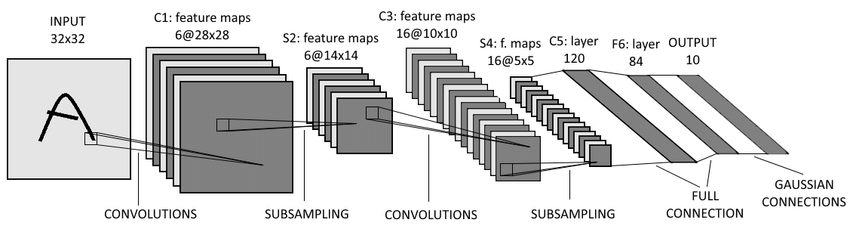

## ***Import Necessary Libraries***

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Loading the data & dividing them into train & test data separately

In [3]:
x_train.shape[0]

60000

In [4]:
x_train.shape

(60000, 28, 28)

## ***performing reshaping***

In [5]:


x_train = x_train.reshape(x_train.shape[0], 28,28, 1)  
x_test = x_test.reshape(x_test.shape[0],28,28, 1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

## ***Normalization***

In [7]:


x_train = x_train / 255
x_test = x_test / 255 #min max 0-1

In [8]:
y_train[0]

5

In [9]:
0,1,2,3,4,5,6,7,8,9

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

## ***One Hot Encoding***

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## ***Model Architecture***

In [12]:
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation='tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size = (5,5), padding = 'valid', activation='tanh'))
model.add(AveragePooling2D(pool_size= (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

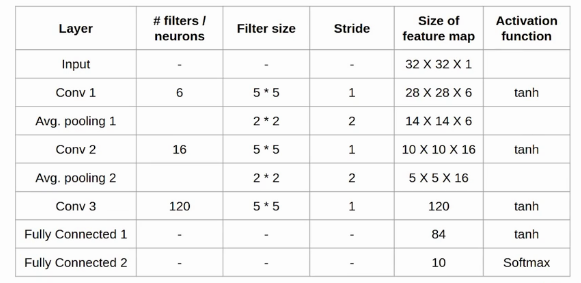

In [13]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size = 128, epochs=10 , verbose= 1, validation_data = (x_test, y_test))  # train the model and store the training history in the history

Epoch 1/10
469/469 [==============================] - 11s 11ms/step - loss: 0.3584 - accuracy: 0.8964 - val_loss: 0.1573 - val_accuracy: 0.9517
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1325 - accuracy: 0.9599 - val_loss: 0.0957 - val_accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0862 - accuracy: 0.9742 - val_loss: 0.0708 - val_accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.0644 - val_accuracy: 0.9796
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0554 - val_accuracy: 0.9825
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0478 - val_accuracy: 0.9848
Epo

In [15]:
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9836
Test loss: 0.05057365074753761
Test accuracy: 0.9836000204086304


## ***Model Loss***

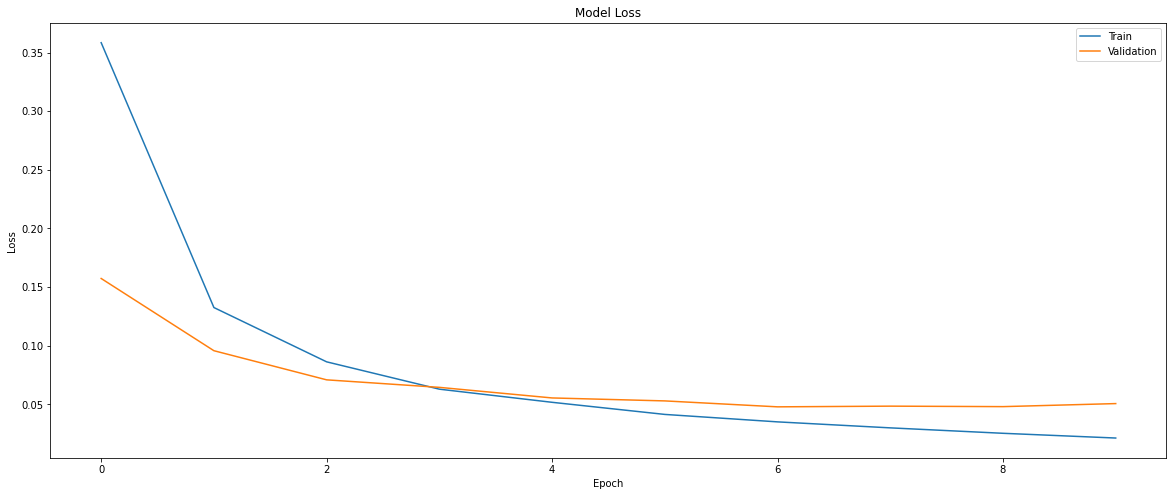

In [16]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])   # history.history dictionary contains the training loss and validation loss for each epoch under the keys loss and val_loss, respectively.
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## ***Model Accuracy***

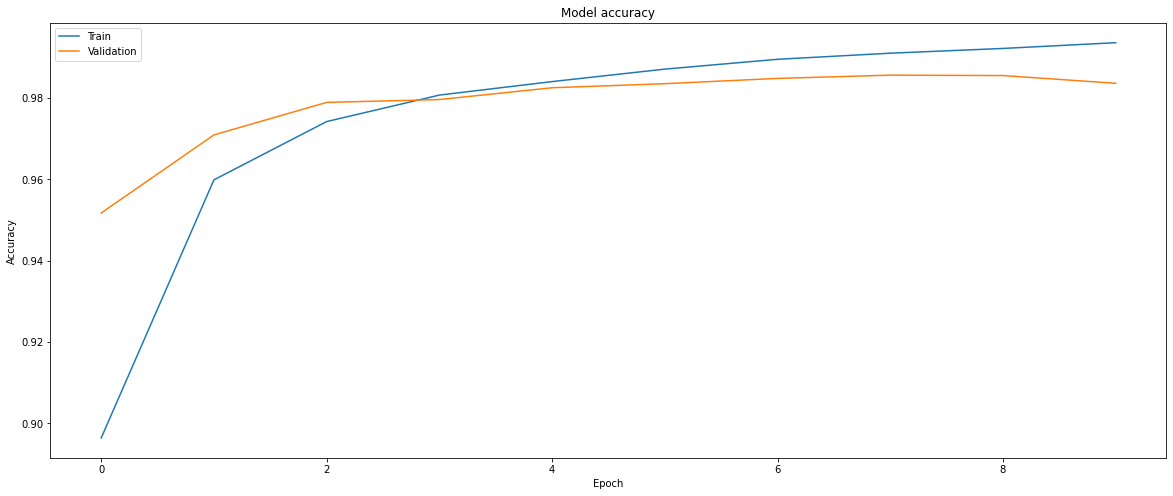

In [17]:
# plot training and validation accuracy

plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()